## This notebook is used to experiment with different analysis workflows on CSV file (Electronic_product_detail.csv) before building the final automated analyzer script.

In [54]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [55]:
# reading csv file
file = pd.read_csv('sample_datasets\electronic_product_detials.csv')


In [56]:
# displaying top 5 rows of the file
file.head()

,OrderID,ProductCategory,ProductPrice,Quantity,Region,OrderDate,PaymentMethod
0,1,Electronics,1200.50,2.0,North,15-01-2024 10:00,Credit Card
1,2,Clothing,45.99,3.0,South,16-01-2024 11:30,Debit Card
2,3,Home Goods,250.00,NaN,East,NaN,Cash
3,4,Books,15.75,5.0,West,NaN,Credit Card
4,5,Electronics,NaN,NaN,North,19-01-2024 15:15,Debit Card


In [57]:
# displaying bottom 5 rows of the file
file.tail(5)

,OrderID,ProductCategory,ProductPrice,Quantity,Region,OrderDate,PaymentMethod
195,196,Food,12.5,8.0,Central,28-01-2024 15:30,Debit Card
196,197,Electronics,950.0,1.0,North,29-01-2024 16:45,Credit Card
197,198,Clothing,70.0,NaN,South,30-01-2024 17:00,Cash
198,199,Home Goods,280.0,1.0,East,31-01-2024 18:15,Debit Card
199,200,Books,22.0,6.0,West,01-02-2024 09:30,Credit Card


In [58]:
print("Data Shape:", file.shape)
print("\nColumns:", file.columns.tolist())
print("\nData Types:\n", file.dtypes)
print("\nMissing Values:\n", file.isnull().sum())


Data Shape: (200, 7)

Columns: ['OrderID', 'ProductCategory', 'ProductPrice', 'Quantity', 'Region', 'OrderDate', 'PaymentMethod']

Data Types:
 OrderID              int64
ProductCategory     object
ProductPrice       float64
Quantity           float64
Region              object
OrderDate           object
PaymentMethod       object
dtype: object

Missing Values:
 OrderID             0
ProductCategory    20
ProductPrice       37
Quantity           51
Region             20
OrderDate          20
PaymentMethod      24
dtype: int64


In [59]:
file.describe()

,OrderID,ProductPrice,Quantity
count,200.000000,163.000000,149.000000
mean,100.500000,307.573313,3.832215
std,57.879185,428.907352,3.072112
min,1.000000,8.500000,1.000000
25%,50.750000,16.500000,2.000000
50%,100.500000,52.000000,3.000000
75%,150.250000,315.000000,5.000000
max,200.000000,1500.000000,12.000000


In [60]:
# displaying the number of unique values column wise
f = file.nunique()
f

OrderID            200
ProductCategory      5
ProductPrice        71
Quantity            12
Region               5
OrderDate           84
PaymentMethod        3
dtype: int64

In [61]:
# displaying number of duplicates column wise
duplicates_per_columns = file.apply(lambda x: x.duplicated().sum())
duplicates_per_columns

OrderID              0
ProductCategory    194
ProductPrice       128
Quantity           187
Region             194
OrderDate          115
PaymentMethod      196
dtype: int64

In [62]:
file.describe(include='all')


,OrderID,ProductCategory,ProductPrice,Quantity,Region,OrderDate,PaymentMethod
count,200.000000,180,163.000000,149.000000,180,180,176
unique,NaN,5,NaN,NaN,5,84,3
top,NaN,Books,NaN,NaN,West,15-01-2024 10:00,Credit Card
freq,NaN,43,NaN,NaN,43,8,83
mean,100.500000,NaN,307.573313,3.832215,NaN,NaN,NaN
std,57.879185,NaN,428.907352,3.072112,NaN,NaN,NaN
min,1.000000,NaN,8.500000,1.000000,NaN,NaN,NaN
25%,50.750000,NaN,16.500000,2.000000,NaN,NaN,NaN
50%,100.500000,NaN,52.000000,3.000000,NaN,NaN,NaN
75%,150.250000,NaN,315.000000,5.000000,NaN,NaN,NaN


In [63]:
categorical_columns = ['ProductCategory', 'Region', 'PaymentMethod']
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n")
    print(file[col].value_counts())



Value Counts for ProductCategory:

ProductCategory
Books          43
Electronics    39
Clothing       37
Home Goods     34
Food           27
Name: count, dtype: int64

Value Counts for Region:

Region
West       43
North      40
South      37
East       35
Central    25
Name: count, dtype: int64

Value Counts for PaymentMethod:

PaymentMethod
Credit Card    83
Debit Card     59
Cash           34
Name: count, dtype: int64


C:\Users\shree\AppData\Local\Temp\ipykernel_17148\3895192522.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x=bar_x, y=bar_y, palette='viridis')


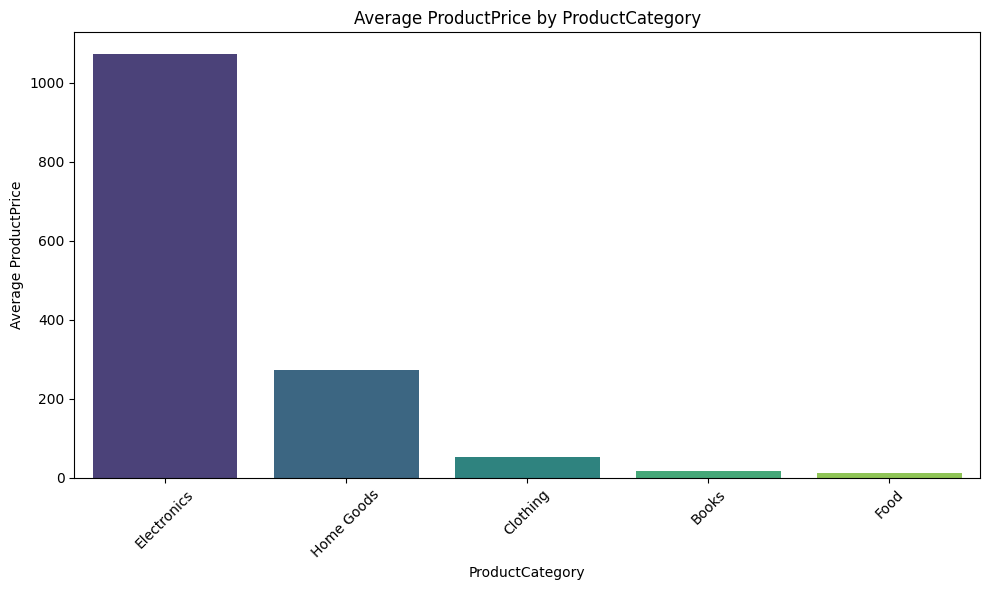

In [65]:
# Example: Average ProductPrice per ProductCategory
bar_x = 'ProductCategory'
bar_y = 'ProductPrice'

bar_data = file.groupby(bar_x)[bar_y].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=bar_data, x=bar_x, y=bar_y, palette='viridis')
plt.title(f"Average {bar_y} by {bar_x}")
plt.xticks(rotation=45)
plt.xlabel(bar_x)
plt.ylabel(f"Average {bar_y}")
plt.tight_layout()
plt.show()


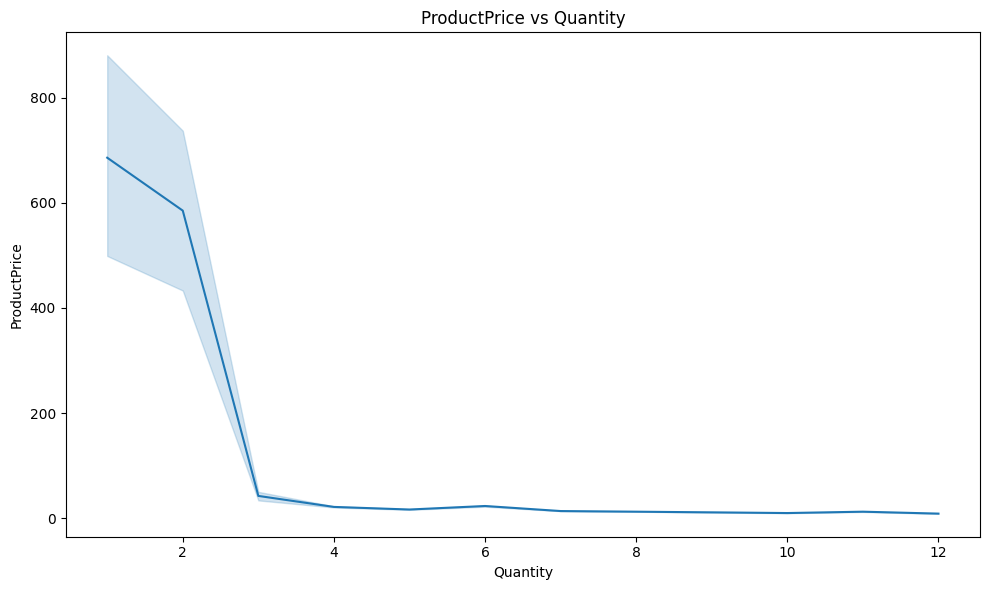

In [66]:
# Example: Quantity vs ProductPrice
x_axis = 'Quantity'
y_axis = 'ProductPrice'

plt.figure(figsize=(10, 6))
sns.lineplot(data=file, x=x_axis, y=y_axis)
plt.title(f"{y_axis} vs {x_axis}")
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.tight_layout()
plt.show()


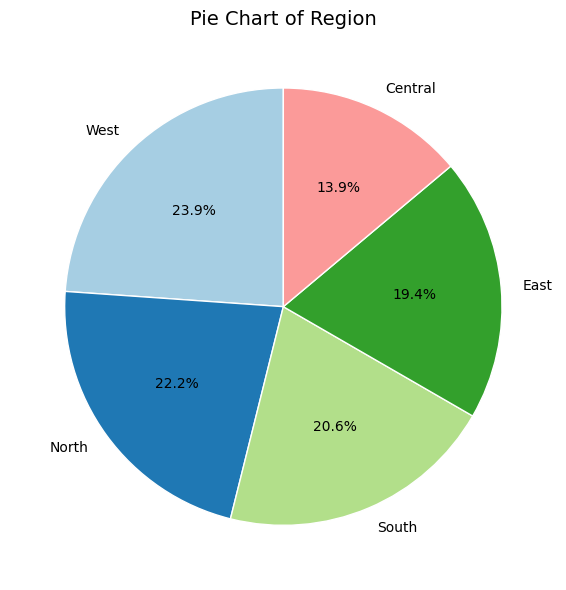

In [67]:
# Choose column to plot
column_to_plot = 'Region'

pie_data = file[column_to_plot].value_counts()
threshold = 0.05 * pie_data.sum()
pie_data_adjusted = pie_data.copy()
pie_data_adjusted['Others'] = pie_data[pie_data < threshold].sum()
pie_data_adjusted = pie_data_adjusted[pie_data_adjusted >= threshold]

colors = plt.cm.Paired(range(len(pie_data_adjusted)))

plt.figure(figsize=(8, 6))
pie_data_adjusted.plot.pie(
    autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
    textprops={'fontsize': 10},
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    startangle=90
)
plt.ylabel('')
plt.title(f'Pie Chart of {column_to_plot}', fontsize=14)
plt.tight_layout()
plt.show()
